- 都道府県別の広告主、インフルエンサーの在庫供給（１インフルエンサーあたり採用数）- 月に一回

In [1]:
import pandas as pd
import numpy as np

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.cm as cm #Builtin colormaps, colormap handling utilities, and the ScalarMappable mixin.

import japanmap as jm

from datetime import datetime 

In [2]:
font = {"family":"IPAexGothic"}
plt.rc('font', **font)

# Import data

In [3]:
# select offers.id as offer_id, offers.campaign_id as campaign_id, offers.created_at, offers.status, offers.user_influencer_id,
# campaigns.pref, campaigns.project_type, campaigns.genre_id
# from offers
# left join campaigns
# on campaigns.id = offers.campaign_id
# where (pref is not null) and (offers.created_at >= '2020-01-01')

In [4]:
# df = pd.read_csv('1084765_2020_10_01_offers.csv')
# add in genre_id data:
# df = pd.read_csv('1084772_2020_10_01_offers.csv')
# df = pd.read_csv('1084813_2020_10_01_offers.csv')
df = pd.read_csv('New_Query_2020_10_19_offers.csv')


In [5]:
# df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d')
df['created_at'] = pd.to_datetime(df['created_at'])

In [6]:
df.head()

,offer_id,campaign_id,created_at,status,user_influencer_id,pref,project_type,genre_id
0,80183,406,2020-01-01 00:01:21,50,6834,23,10,1.0
1,80184,2022,2020-01-01 00:07:02,21,6834,23,10,1.0
2,80187,2666,2020-01-01 01:28:46,50,3429,13,10,1.0
3,80190,2630,2020-01-01 01:49:48,50,211,13,10,3.0
4,80191,2630,2020-01-01 02:01:19,50,1377,13,10,3.0


In [7]:
len(df)

98337

In [8]:
# exclude today's data 

df = df[df.created_at <  datetime.today()]

In [9]:
len(df)

98337

In [10]:
df['date'] = df['created_at'].dt.strftime('%Y-%m-%d')

In [11]:
list_accepted_status = [10,20,21,30,31,15,16]
df['accepted'] = df['status'].apply(lambda x: x in list_accepted_status)

In [12]:
df.head()

,offer_id,campaign_id,created_at,status,user_influencer_id,pref,project_type,genre_id,date,accepted
0,80183,406,2020-01-01 00:01:21,50,6834,23,10,1.0,2020-01-01,False
1,80184,2022,2020-01-01 00:07:02,21,6834,23,10,1.0,2020-01-01,True
2,80187,2666,2020-01-01 01:28:46,50,3429,13,10,1.0,2020-01-01,False
3,80190,2630,2020-01-01 01:49:48,50,211,13,10,3.0,2020-01-01,False
4,80191,2630,2020-01-01 02:01:19,50,1377,13,10,3.0,2020-01-01,False


## df_months, maps (dictionaries), and list of Japan regions

In [17]:
df_months = pd.DataFrame({'year2020_month':['January', 'February', 'March', 'April', 'May', 'June', 
                                          'July', 'August', 'September', 'October']})
                                            #, 'November', 'December']})

In [18]:
map_months = {
    'January': '1月',
    'February': '2月',
    'March': '3月',
    'April': '4月',
    'May': '5月',
    'June': '6月',
    'July': '7月',
    'August': '8月',
    'September': '9月',
    'October': '10月',
    'November': '11月',
    'December': '12月'
}

In [19]:
map_genre = { 1: '1: グルメ',
            2: '2: トラベル',
            3: '3: ビューティー',
            4: '4: レジャー'}

In [20]:
map_pref = {
1: '1: 北海道',
2: '2: 青森県',
3: '3: 岩手県',
4: '4: 宮城県',
5: '5: 秋田県',
6: '6: 山形県',
7: '7: 福島県',
8: '8: 茨城県',
9: '9: 栃木県',
10: '10: 群馬県',
11: '11: 埼玉県',
12: '12: 千葉県',
13: '13: 東京都',
14: '14: 神奈川県',
15: '15: 新潟県',
16: '16: 富山県',
17: '17: 石川県',
18: '18: 福井県',
19: '19: 山梨県',
20: '20: 長野県',
21: '21: 岐阜県',
22: '22: 静岡県',
23: '23: 愛知県',
24: '24: 三重県',
25: '25: 滋賀県',
26: '26: 京都府',
27: '27: 大阪府',
28: '28: 兵庫県',
29: '29: 奈良県',
30: '30: 和歌山県',
31: '31: 鳥取県',
32: '32: 島根県',
33: '33: 岡山県',
34: '34: 広島県',
35: '35: 山口県',
36: '36: 徳島県',
37: '37: 香川県',
38: '38: 愛媛県',
39: '39: 高知県',
40: '40: 福岡県',
41: '41: 佐賀県',
42: '42: 長崎県',
43: '43: 熊本県',
44: '44: 大分県',
45: '45: 宮崎県',
46: '46: 鹿児島県',
47: '47: 沖縄県'
}

In [21]:
map_pref_kanji = {
1: '北海道',
2: '青森県',
3: '岩手県',
4: '宮城県',
5: '秋田県',
6: '山形県',
7: '福島県',
8: '茨城県',
9: '栃木県',
10: '群馬県',
11: '埼玉県',
12: '千葉県',
13: '東京都',
14: '神奈川県',
15: '新潟県',
16: '富山県',
17: '石川県',
18: '福井県',
19: '山梨県',
20: '長野県',
21: '岐阜県',
22: '静岡県',
23: '愛知県',
24: '三重県',
25: '滋賀県',
26: '京都府',
27: '大阪府',
28: '兵庫県',
29: '奈良県',
30: '和歌山県',
31: '鳥取県',
32: '島根県',
33: '岡山県',
34: '広島県',
35: '山口県',
36: '徳島県',
37: '香川県',
38: '愛媛県',
39: '高知県',
40: '福岡県',
41: '佐賀県',
42: '長崎県',
43: '熊本県',
44: '大分県',
45: '宮崎県',
46: '鹿児島県',
47: '沖縄県'
}

In [22]:
map_regions = {'tohoku': '東北地方',
              'quiet_kanto':'北関東(茨城県, 栃木県, 群馬県)',
              'chubu':'中部地方',
              'quiet_kansai':'関西(大都市以外)',
               'chugoku':'中国地方',
              'shikoku':'四国',
              'kyushu':'九州地方(沖縄含む)'}


In [23]:
#  Akita, Aomori, Fukushima, Iwate, Miyagi, and Yamagata
list_tohoku = [2,3,4,5,6,7]

In [24]:
# Gunma, Tochigi, Ibaraki, Saitama, Tokyo, Chiba and Kanagawa
# 関東地方=茨城 栃木 群馬 埼玉 千葉 東京 神奈川
# 首都圏=関東地方+山梨

list_quiet_kanto = [8,9,10] # 茨城県, 栃木県, 群馬県

In [25]:
# Aichi, Fukui, Gifu, Ishikawa, Nagano, Niigata, Shizuoka, Toyama, and Yamanashi
list_chubu = [15,16,17,18,19,20,21,22,23]

In [26]:
# Mie, Nara, Wakayama, Kyoto, Osaka, Hyōgo and Shiga, (sometimes Fukui, Tokushima and Tottori

list_quiet_kansai = [24,25,29,30] #三重県, 滋賀県, 奈良県, 和歌山県

In [27]:
#  Hiroshima, Okayama, Shimane, Tottori, and Yamaguchi
list_chugoku = [31,32,33,34,35]

In [28]:
# Ehime, Kagawa, Kōchi, and Tokushima
list_shikoku = [36,37,38,39]

In [29]:
# Northern Kyushu - Fukuoka, Kumamoto, Nagasaki, Ōita, Saga
# Southern Kyushu - Kagoshima, Miyazaki, Okinawa
list_kyushu = [40,41,42,43,44,45,46,47]

In [30]:
dict_regions = {'tohoku': list_tohoku,
                'quiet_kanto': list_quiet_kanto,
                'chubu': list_chubu,
                'quiet_kansai': list_quiet_kansai,
                'chugoku': list_chugoku,
                'shikoku': list_shikoku,
                'kyushu': list_kyushu
               }

In [31]:
# [map_pref[x] for x in list_kyushu]

## Functions to automate calculations and plot graphs

In [32]:
def get_df_for_genre_prefecture_cam_inf_counts(genre, prefecture):
    
#     print('ジャンル ', map_genre[genre])
#     print('都道府県名 ', map_pref[prefecture])
    
    df_genre = df[df.genre_id == genre]
    df_genre_pref = df_genre[df_genre.pref == prefecture]
    
    df_genre_pref_timeseries = (df_genre_pref.groupby(df_genre_pref['created_at'].dt.month_name(), sort=False)
                                .agg({'accepted': 'sum',
                                      'user_influencer_id': 'nunique',
                                      'campaign_id': 'nunique'})
                                .reset_index()
                                .rename(columns = {'accepted':'accepted_offer_count',
                                                   'user_influencer_id': 'influencer_count',
                                                   'campaign_id': 'campaign_count',
                                                    'created_at': 'year2020_month'
                                                   })
                                )

    df_genre_pref_timeseries['acc_offers_per_inf'] = (df_genre_pref_timeseries['accepted_offer_count']/
                                                      df_genre_pref_timeseries['influencer_count'])
    
    df_genre_pref_timeseries_pretty = df_months.merge(df_genre_pref_timeseries,
                                                      how = 'left',
                                                      on = 'year2020_month')
    
    df_genre_pref_timeseries_pretty.fillna(0, inplace = True)
    
    return df_genre_pref_timeseries_pretty

In [33]:
# for showing area (rather than individual pref) data
# list_tohoku
# list_quiet_kanto
# list_chubu
# list_quiet_kansai
# list_chugoku
# list_shikoku
# list_kyushu

def get_df_for_genre_region_cam_inf_counts(genre, region_name):
    
    df_genre = df[df.genre_id == genre]
    df_genre_pref = df_genre[df_genre['pref'].isin(list(dict_regions[region_name]))]
#     print(list(dict_regions[region_name]))

    df_genre_pref_timeseries = (df_genre_pref.groupby(df_genre_pref['created_at'].dt.month_name(), sort=False)
                                .agg({'accepted': 'sum',
                                      'user_influencer_id': 'nunique',
                                      'campaign_id': 'nunique'})
                                .reset_index()
                                .rename(columns = {'accepted':'accepted_offer_count',
                                                   'user_influencer_id': 'influencer_count',
                                                   'campaign_id': 'campaign_count',
                                                    'created_at': 'year2020_month'
                                                   })
                                )

    df_genre_pref_timeseries['acc_offers_per_inf'] = (df_genre_pref_timeseries['accepted_offer_count']/
                                                      df_genre_pref_timeseries['influencer_count'])
    
    df_genre_pref_timeseries_pretty = df_months.merge(df_genre_pref_timeseries,
                                                      how = 'left',
                                                      on = 'year2020_month')
    
    df_genre_pref_timeseries_pretty.fillna(0, inplace = True)     
        
    return df_genre_pref_timeseries_pretty

In [34]:
# get_df_for_genre_region_cam_inf_counts(1, 'tohoku')
# get_df_for_genre_prefecture_cam_inf_counts(3, 13)

In [35]:
def plot_df_for_genre_prefecture_cam_inf_counts(genre, prefecture):
    
    df_genre_prefecture_timeseries = get_df_for_genre_prefecture_cam_inf_counts(genre, prefecture)
#     print(df_genre_prefecture_timeseries)
    
    df_describe = df_genre_prefecture_timeseries.describe()
    if any(df_describe.iloc[1].values == 0):
        print('本県では0件のオファーが記録されています。')
        print()
        return()
    else:
        # top graph, campaign and influencer counts
        fig, axs = plt.subplots(2, figsize=(8, 7))

        axs[0].plot(df_genre_prefecture_timeseries['year2020_month'], 
                df_genre_prefecture_timeseries['influencer_count'], 
                color = 'dodgerblue',
                label = 'インフルエンサー数',
                linewidth = 2)


        axs_0_2 = axs[0].twinx()  
        axs_0_2.plot(df_genre_prefecture_timeseries['year2020_month'], 
                df_genre_prefecture_timeseries['campaign_count'], 
                color = 'lawngreen',
                label = 'CP数',
                linewidth = 2
                )

        axs[0].set_xticklabels(df_genre_prefecture_timeseries['year2020_month'].map(map_months),
        #                     rotation = 90,
                              ha = 'center', fontsize = 14)

        axs[0].set_ylabel("インフルエンサー数", fontsize = 14, labelpad = 10)
        axs[0].set_yticklabels(axs[0].get_yticks(), fontsize = 14)   
        axs_0_ylabels = [item.get_text() for item in axs[0].get_yticklabels()]
        axs[0].set_yticklabels([str(round(float(label), 3)) for label in axs_0_ylabels], fontsize = 14)

        axs_0_2.set_ylabel("CP数", fontsize = 16, labelpad = 10)
        axs_0_2.set_yticklabels(axs_0_2.get_yticks(), fontsize = 14) 
        axs_0_2_ylabels = [item.get_text() for item in axs_0_2.get_yticklabels()]
        axs_0_2.set_yticklabels([str(round(float(label), 2)) for label in axs_0_2_ylabels], fontsize = 14)

        axs[0].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 13)
        axs_0_2.legend(bbox_to_anchor=(1,0.85), loc="upper right", fontsize = 13)


        # bottom graph: offers per campaign
        axs[1].plot(df_genre_prefecture_timeseries['year2020_month'], 
                df_genre_prefecture_timeseries['acc_offers_per_inf'], 
                color = 'orange',
                label = '１インフルエンサーあたり平均採用数',
                linewidth = 2)

        axs[1].set_xticklabels(df_genre_prefecture_timeseries['year2020_month'].map(map_months),
                              ha = 'center', fontsize = 14)

        axs[1].set_ylabel("平均採用数", fontsize = 14, labelpad = 10)
        axs[1].set_yticklabels([str(round(float(label), 3)) for label in axs[1].get_yticks()], fontsize = 14)
    # a little strange here - can't really control the number of decimal, but if exclude, then weird formatting, e.g. : 0.7000001
        
        axs[1].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 13)
        
        genre = map_genre[genre]
        prefecture = map_pref[prefecture]
        
        plt.title(genre + ' ' + prefecture,
                 fontsize = 20)

        plt.show()  

        return ()

In [36]:
# for region rather than pref

def plot_df_for_genre_region_cam_inf_counts(genre, region_name):
    
    df_genre_region_timeseries = get_df_for_genre_region_cam_inf_counts(genre, region_name)
#     print(df_genre_region_timeseries)
    
    df_describe = df_genre_region_timeseries.describe()
    if any(df_describe.iloc[1].values == 0):
        print('本県では0件のオファーが記録されています。')
        print()
        return()
    else:
        # top graph, campaign and influencer counts
        fig, axs = plt.subplots(2, figsize=(8, 7))

        axs[0].plot(df_genre_region_timeseries['year2020_month'], 
                df_genre_region_timeseries['influencer_count'], 
                color = 'dodgerblue',
                label = 'インフルエンサー数',
                linewidth = 2)


        axs_0_2 = axs[0].twinx()  
        axs_0_2.plot(df_genre_region_timeseries['year2020_month'], 
                df_genre_region_timeseries['campaign_count'], 
                color = 'lawngreen',
                label = 'CP数',
                linewidth = 2
                )

        axs[0].set_xticklabels(df_genre_region_timeseries['year2020_month'].map(map_months),
        #                     rotation = 90,
                              ha = 'center', fontsize = 14)

        axs[0].set_ylabel("インフルエンサー数", fontsize = 14, labelpad = 10)
        axs[0].set_yticklabels(axs[0].get_yticks(), fontsize = 14)   
        axs_0_ylabels = [item.get_text() for item in axs[0].get_yticklabels()]
        axs[0].set_yticklabels([str(round(float(label), 3)) for label in axs_0_ylabels], fontsize = 14)

        axs_0_2.set_ylabel("CP数", fontsize = 16, labelpad = 10)
        axs_0_2.set_yticklabels(axs_0_2.get_yticks(), fontsize = 14) 
        axs_0_2_ylabels = [item.get_text() for item in axs_0_2.get_yticklabels()]
        axs_0_2.set_yticklabels([str(round(float(label), 2)) for label in axs_0_2_ylabels], fontsize = 14)

        axs[0].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 13)
        axs_0_2.legend(bbox_to_anchor=(1,0.85), loc="upper right", fontsize = 13)


        # bottom graph: offers per campaign
        axs[1].plot(df_genre_region_timeseries['year2020_month'], 
                df_genre_region_timeseries['acc_offers_per_inf'], 
                color = 'orange',
                label = '１インフルエンサーあたり平均採用数',
                linewidth = 2)

        axs[1].set_xticklabels(df_genre_region_timeseries['year2020_month'].map(map_months),
                              ha = 'center', fontsize = 14)

        axs[1].set_ylabel("平均採用数", fontsize = 14, labelpad = 10)
#         axs[1].set_yticklabels(axs[1].get_yticks(), fontsize = 14)  
#         axs1_ylabels = [item.get_text() for item in axs[1].get_yticklabels()]
#         print(axs[1].get_yticklabels())
#         print(type(axs[1].get_yticklabels()))
        axs[1].set_yticklabels([str(round(float(label), 3)) for label in axs[1].get_yticks()], fontsize = 14)
    # a little strange here - can't really control the number of decimal, but if exclude, then weird formatting, e.g. : 0.7000001
        
        axs[1].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 13)
        
        genre = map_genre[genre]
        region = map_regions[region_name]
        
        plt.title(genre + ' , 地方: ' + region,
                 fontsize = 20)

        plt.show()  

        return ()

In [37]:
# let user set timeperiod

def get_summary_df(genre, t_start, t_end):
    
    df_genre = df[df.genre_id == genre]
    df_genre_period = df_genre[(df_genre.created_at >= t_start)
                              & (df_genre.created_at <= t_end)]

    df_genre_pref = (df_genre_period.groupby('pref')
                                    .agg({'accepted': 'sum',
                                          'user_influencer_id': 'nunique',
                                          'campaign_id': 'nunique'})
                                    .reset_index()
                                    .rename(columns = {'accepted':'accepted_offer_count',
                                                       'user_influencer_id': 'influencer_count',
                                                       'campaign_id': 'campaign_count',
                                                       })
                                )

    df_genre_pref['acc_offers_per_inf'] = (df_genre_pref['accepted_offer_count']
                                                            / df_genre_pref['influencer_count'])

    df_genre_pref['pref_kanji'] = df_genre_pref['pref'].map(map_pref_kanji)
    
    return df_genre_pref

In [56]:
def plot_choropleth_map_approved_count(genre, t_start, t_end):
    
    print(map_genre[genre])
    
    df_summary = get_summary_df(genre, t_start, t_end)
    df_summary.set_index('pref', inplace = True)
#     print(df_summary)
    
    cmap = plt.get_cmap('RdPu')
    
    vmin = df_summary.acc_offers_per_inf.min()
    vmax = df_summary.acc_offers_per_inf.max()
    norm = plt.Normalize(vmin = df_summary.acc_offers_per_inf.min(), 
                     vmax = df_summary.acc_offers_per_inf.max())
    
    fcol = lambda x: '#' + bytes(cmap(norm(x), bytes=True)[:3]).hex()
    
    plt.figure(figsize = (9,9))

    plt.imshow(jm.picture(df_summary.acc_offers_per_inf.apply(fcol)))
    
    # colorbar
    m = cm.ScalarMappable(cmap = cmap, norm = norm)
    m.set_array(norm)
    plt.colorbar(m, fraction = 0.047, pad = 0.04) # use fraction to control bar height
    
    plt.title('都府県別１インフルエンサーあたり平均採用数',fontsize = 20)
    
    plt.show()
    
    return()
    
    

In [39]:
def plot_summary_graph_approved_count(genre, t_start, t_end):

    df = get_summary_df(genre, t_start, t_end)
    
    fig, axs = plt.subplots(2, figsize=(18, 7))

    ind = np.arange(len(df))
    width = 0.4

    axs[0].bar(ind, 
            df['influencer_count'], 
                width = width,
                align = 'edge',
                color = 'dodgerblue',
                label = 'インフルエンサー数',
            )

    axs_0_2 = axs[0].twinx()  
    axs_0_2.bar(ind + width, 
            df['campaign_count'], 
                            width = width,
                            align = 'edge',
                            color = 'lawngreen',
                            label = 'CP数'
            )

    axs[0].set_xticks(ind + width)
    axs[0].set_xticklabels(df['pref'],
                          ha = 'center')
    axs[0].tick_params(axis='both', which='major', labelsize = 16)
    axs[0].set_ylabel("インフルエンサー数", fontsize = 16, labelpad = 5)

    axs_0_2.set_ylabel("CP数", fontsize = 18, labelpad = 10)
    axs_0_2.tick_params(axis='both', which='major', labelsize = 16)

    axs[0].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 13)
    axs_0_2.legend(bbox_to_anchor=(1,0.85), loc="upper right", fontsize = 13)


    # bottom graph: offers per campaign
    axs[1].bar(df['pref_kanji'], 
            df['acc_offers_per_inf'], 
            color = 'orange',
            label = '１インフルエンサーあたり平均採用数',
            linewidth = 2)

    axs[1].set_xticklabels(df['pref_kanji'],
                           rotation = 90,
                          ha = 'center', fontsize = 14)
    axs[1].tick_params(axis='both', which='major', labelsize = 16)

    axs[1].set_ylabel("平均採用数", fontsize = 18, labelpad = 10)

    axs[1].legend(bbox_to_anchor=(1,1), loc="upper right", fontsize = 14)
    axs[1].axhline(y = 1, color='r', linestyle=':')
    
    plt.title(map_genre[genre], fontsize = 20)

    plt.show()  
    
    return ()



## decide on what areas to show (for detailed part only)

In [40]:
list_areas = [1, 'tohoku', 'quiet_kanto', 11,12,13,14, 
              'chubu', 22, 'quiet_kansai', 23,26,27,28, 
              'chugoku', 'shikoku', 'kyushu']

# genre 1: グルメ

## data summary

1: グルメ


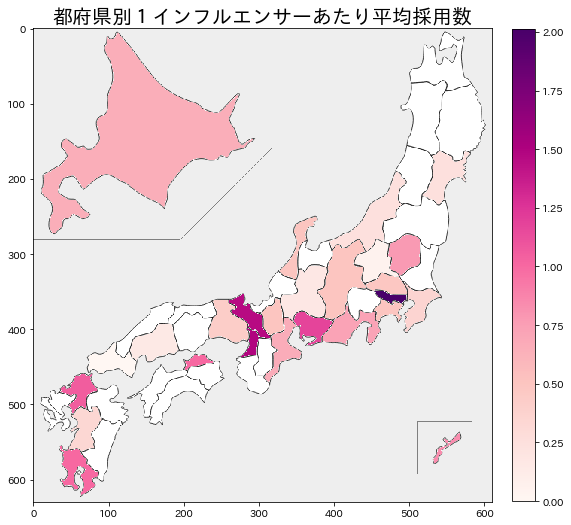

()

In [57]:
plot_choropleth_map_approved_count(1, '2020-07-01', '2020-9-30')

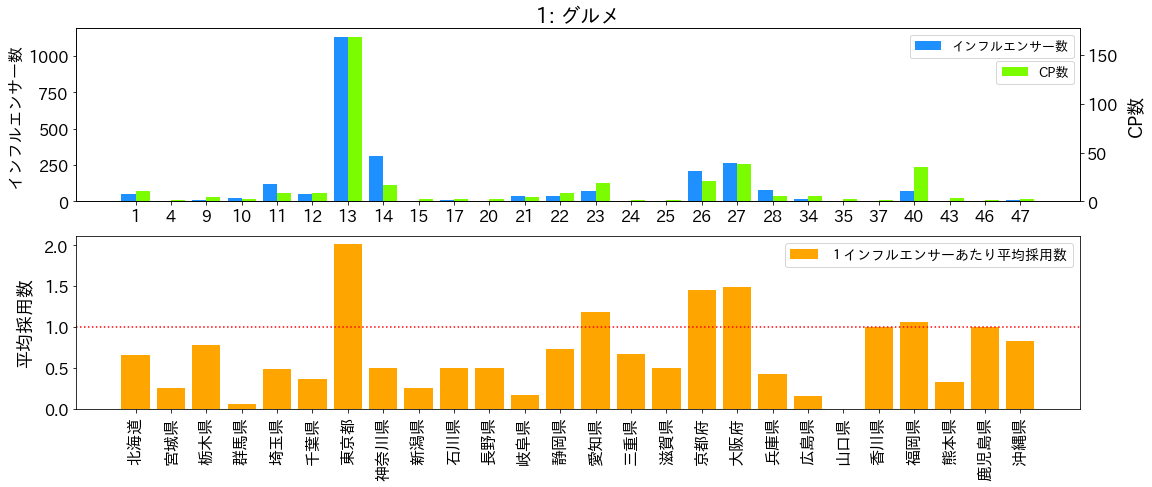

()

In [42]:
plot_summary_graph_approved_count(1, '2020-07-01', '2020-9-30')

## time series analysis

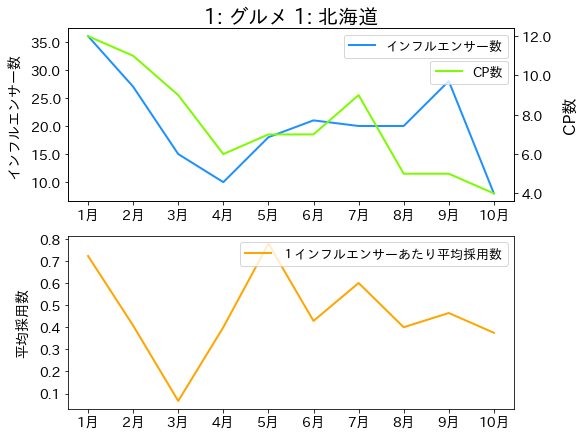

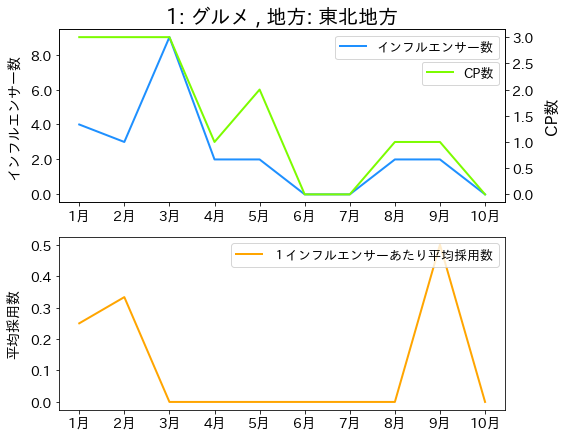

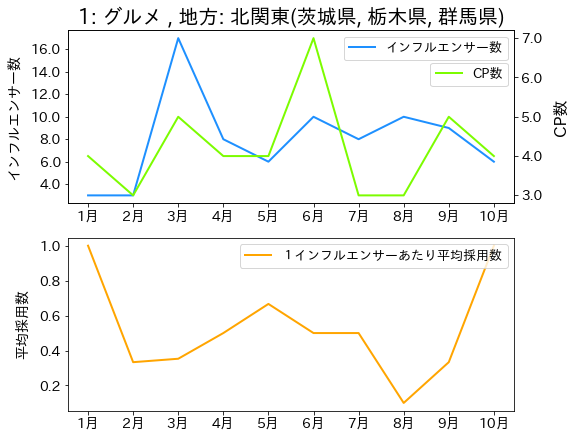

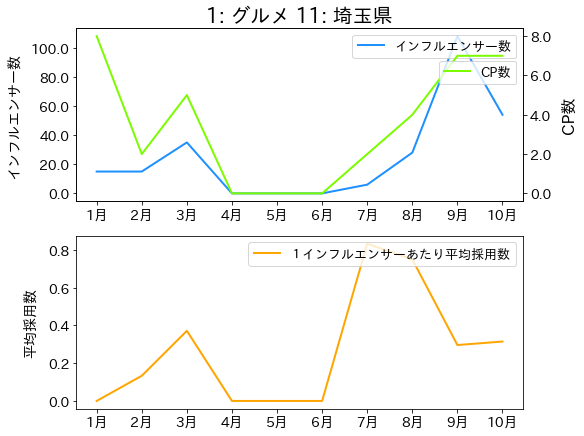

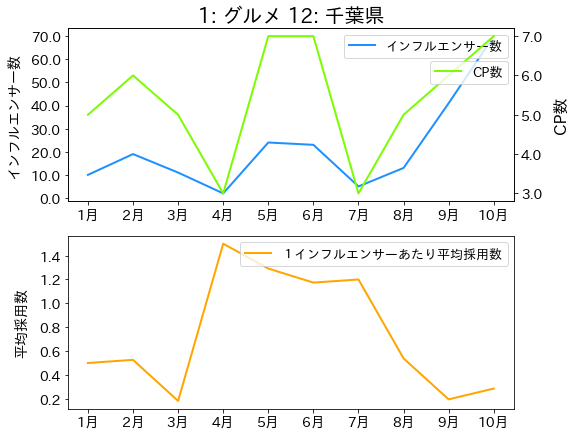

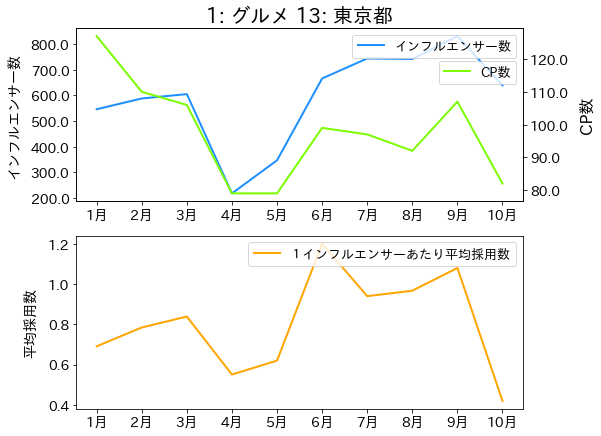

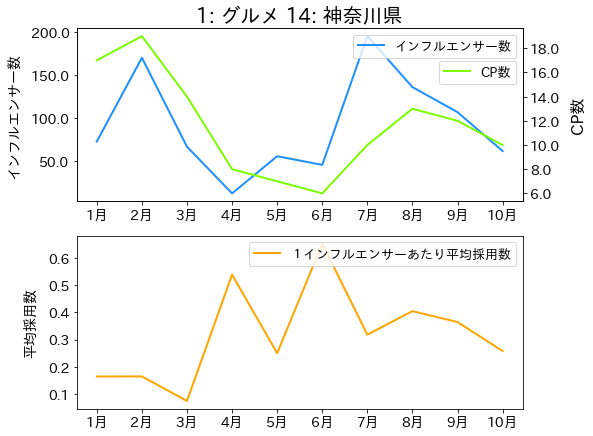

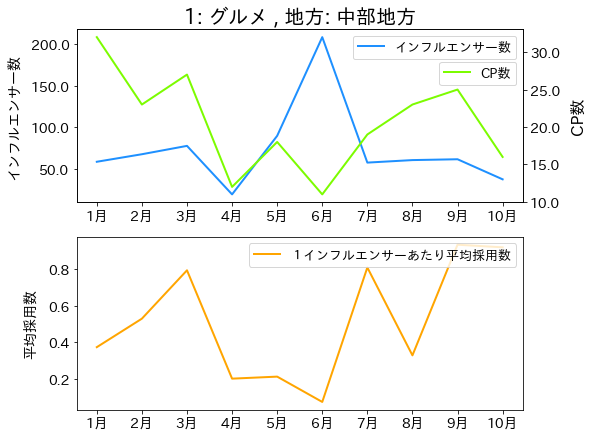

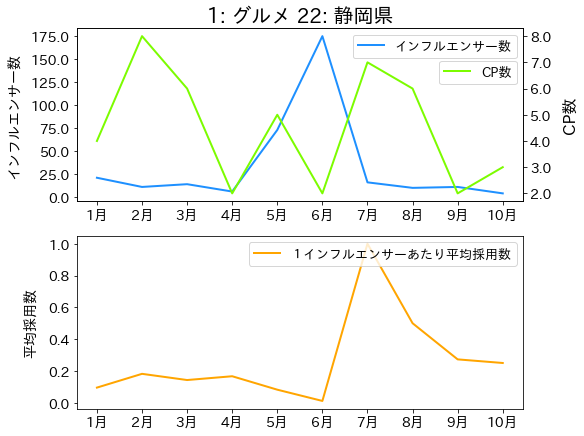

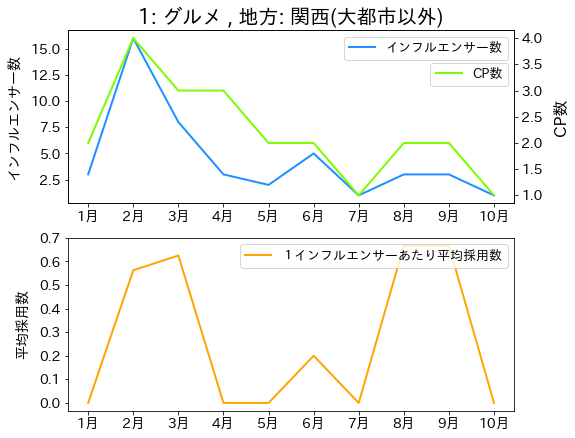

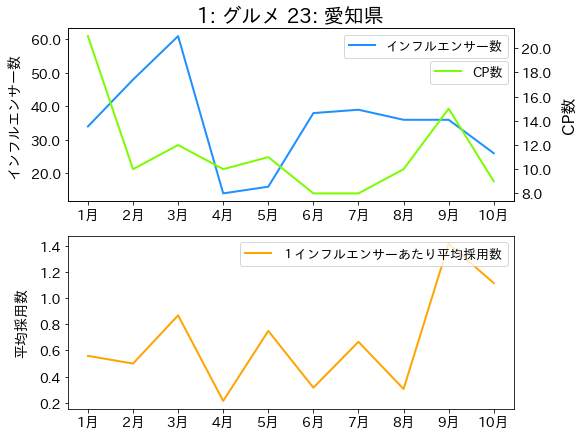

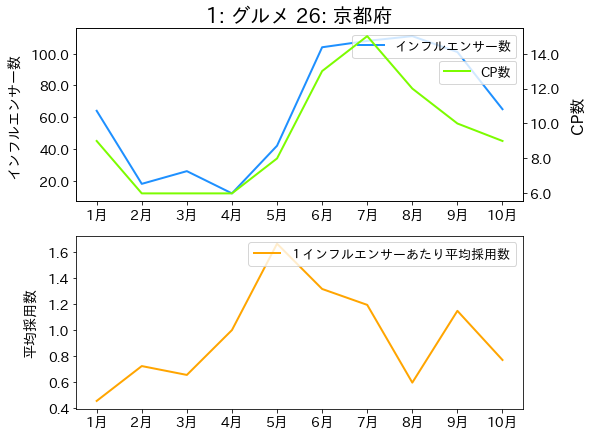

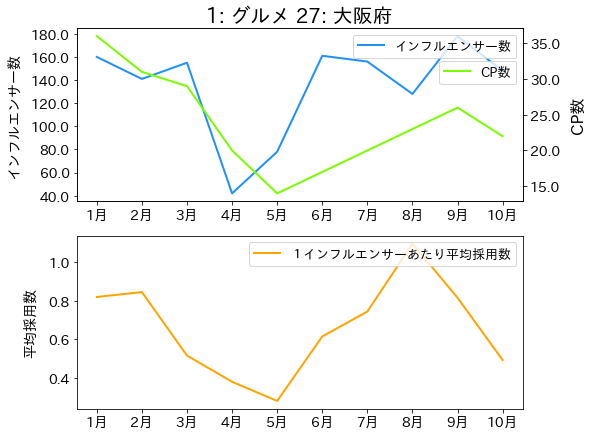

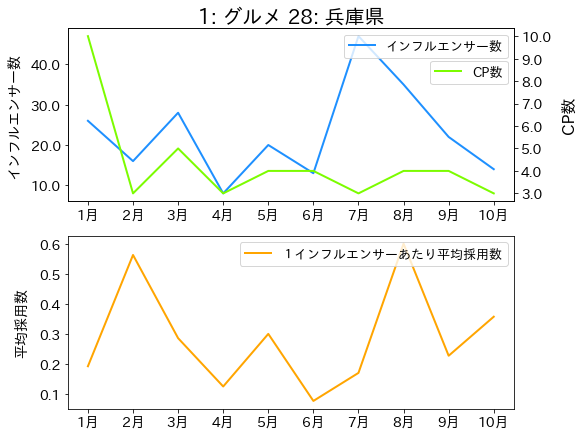

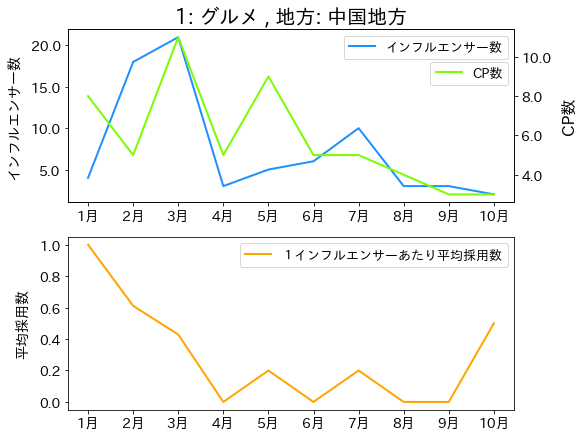

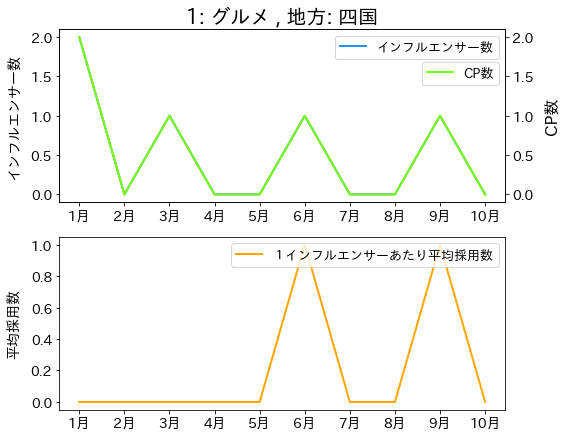

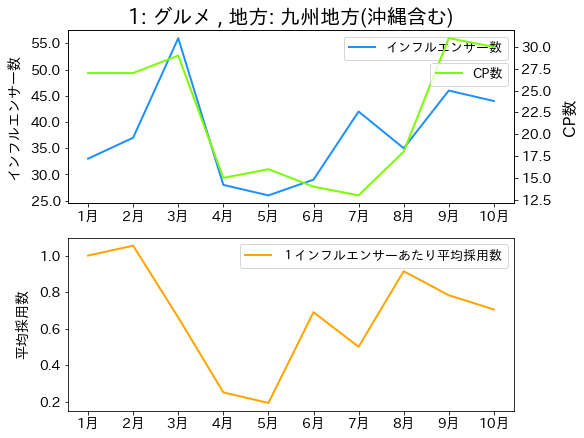

In [43]:
for i in list_areas:
    if type(i) == str:
        plot_df_for_genre_region_cam_inf_counts(1, i)
    elif type(i) == int: 
        plot_df_for_genre_prefecture_cam_inf_counts(1, i)
    print()

# genre 3: ビューティー

## summary

3: ビューティー


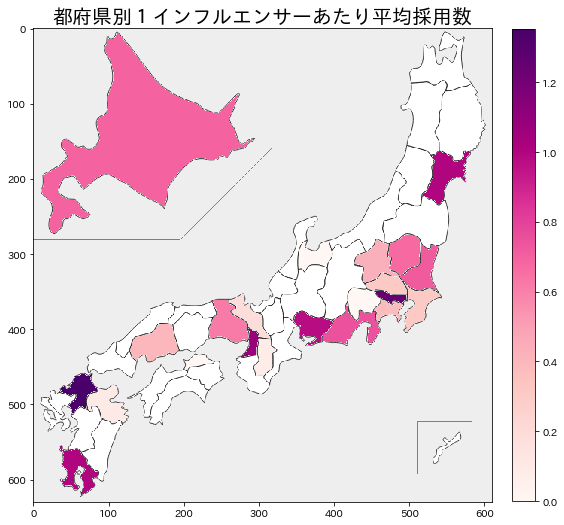

()

In [58]:
plot_choropleth_map_approved_count(3, '2020-07-01', '2020-9-30')

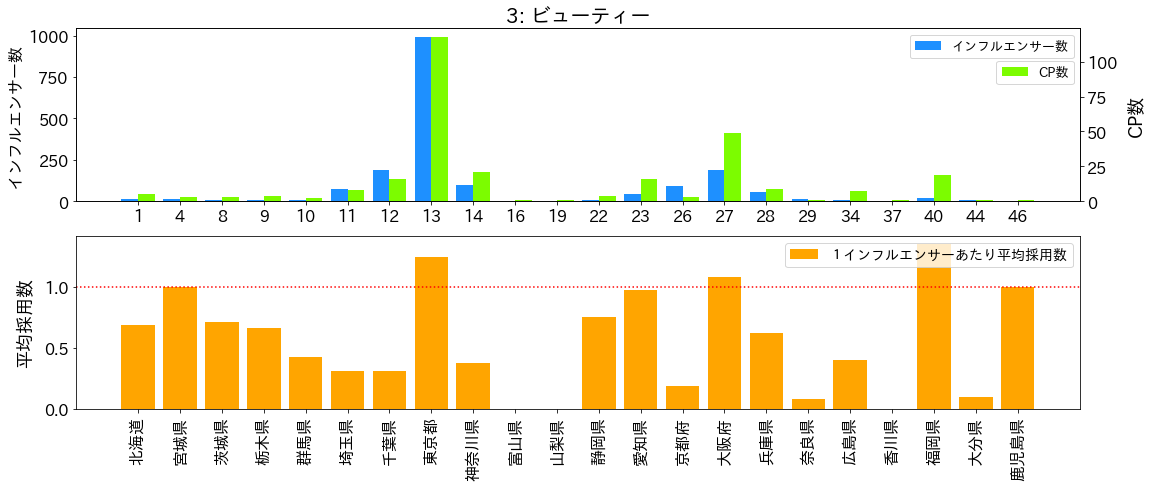

()

In [44]:
plot_summary_graph_approved_count(3, '2020-07-01', '2020-9-30')

## time series analysis

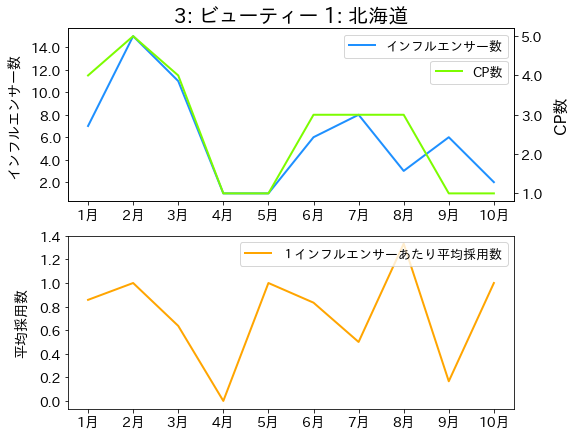

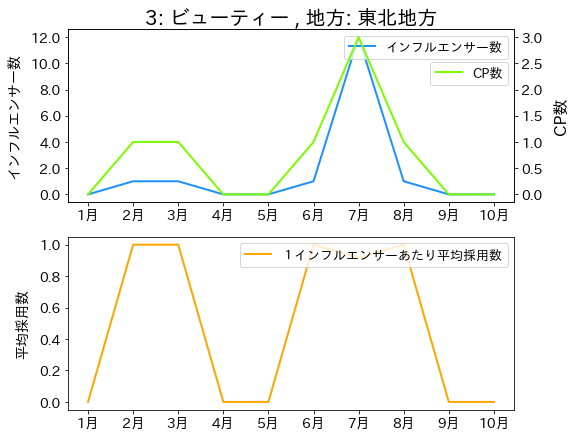

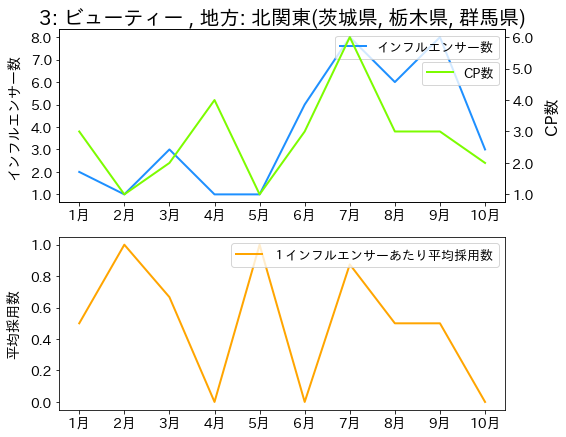

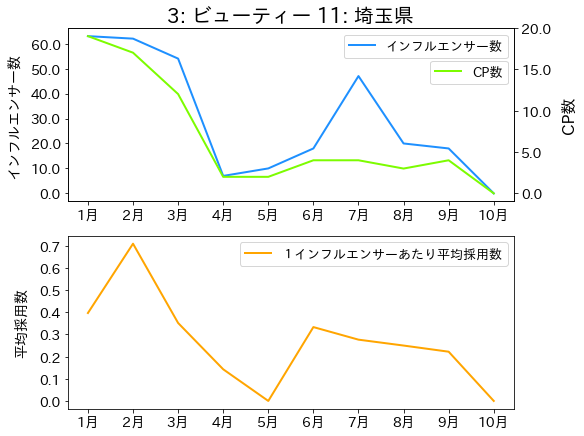

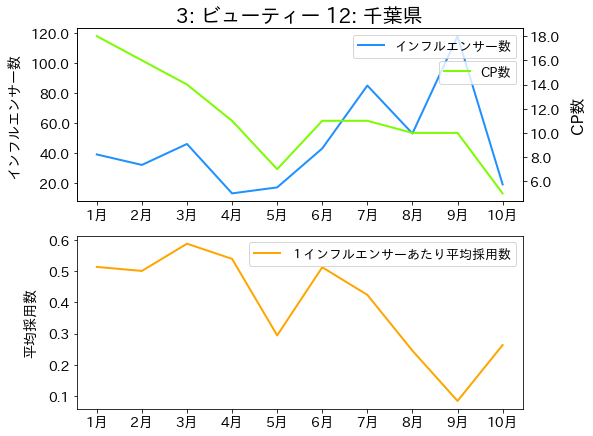

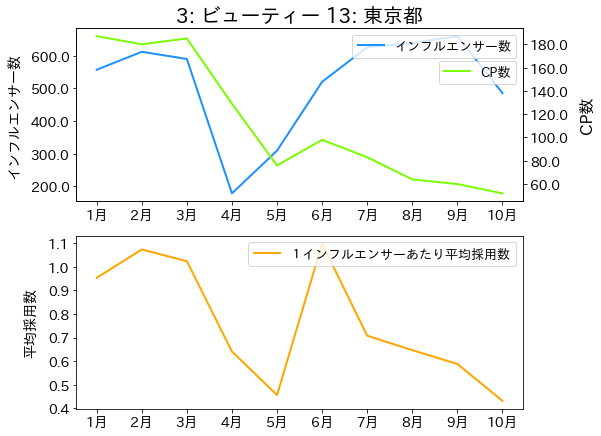

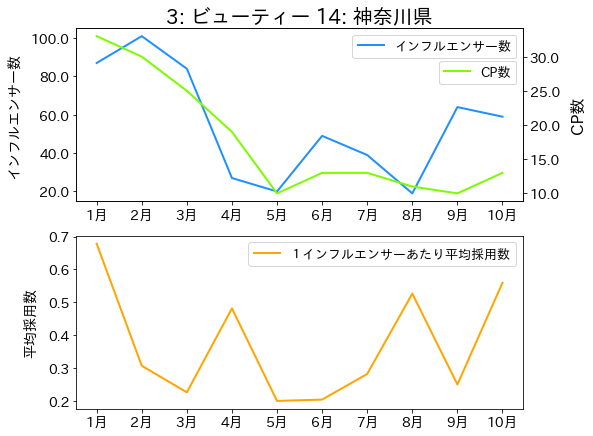

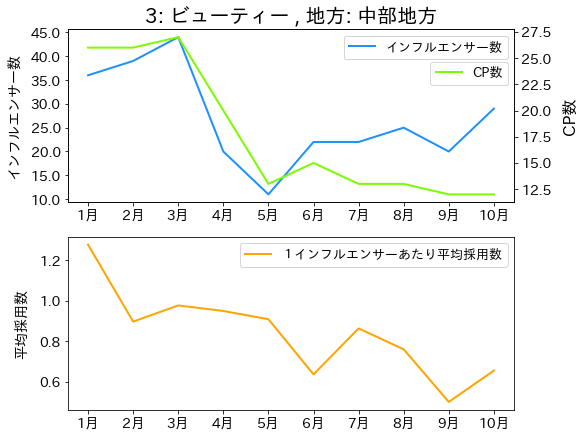

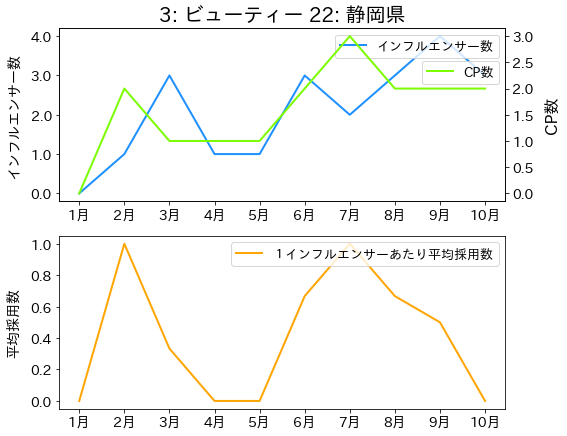

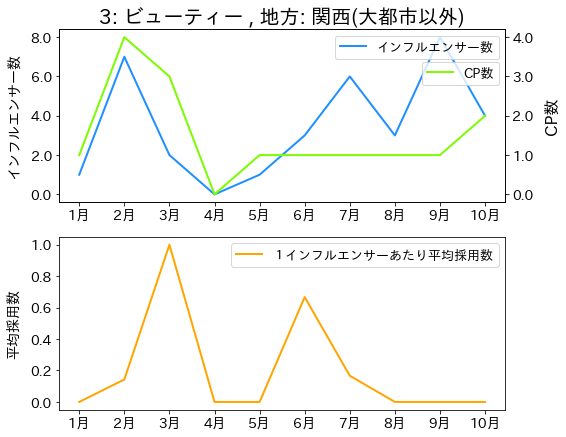

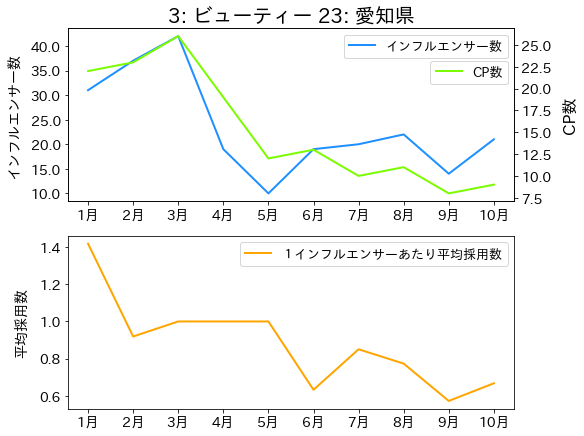

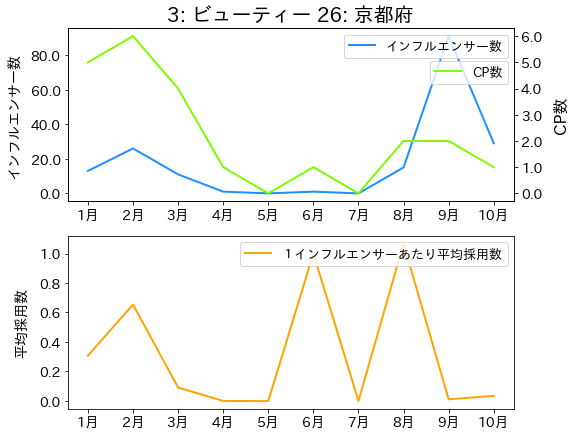

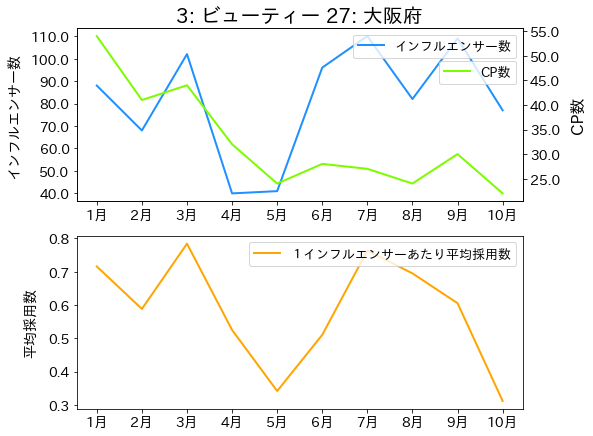

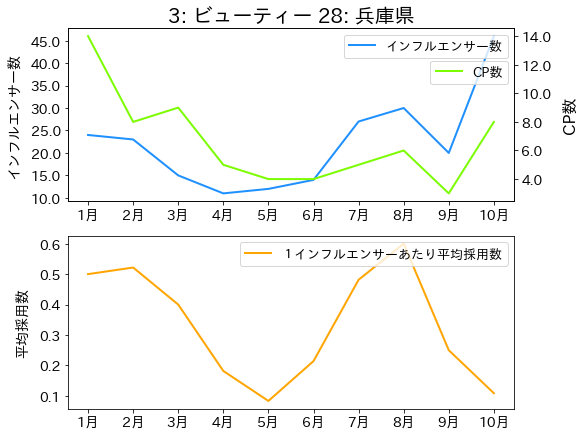

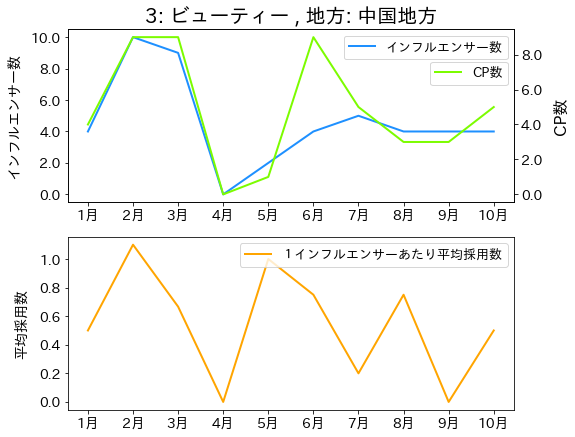

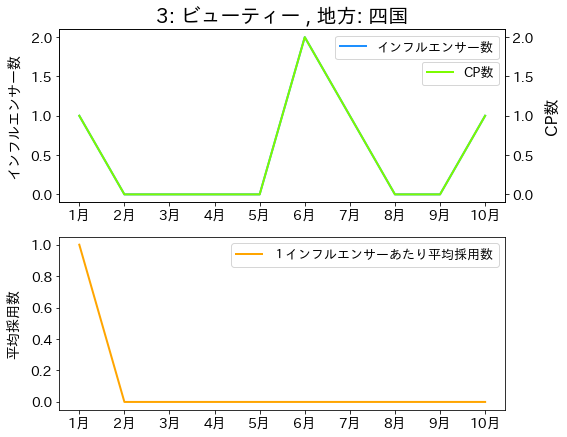

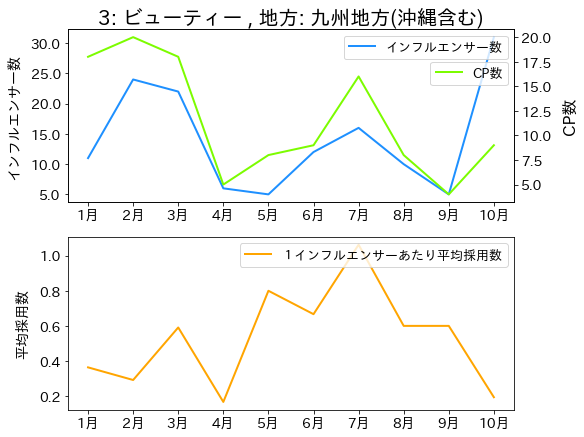

In [45]:
for i in list_areas:
    if type(i) == str:
        plot_df_for_genre_region_cam_inf_counts(3, i)
    elif type(i) == int: 
        plot_df_for_genre_prefecture_cam_inf_counts(3, i)
    print()